100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 185.87it/s]


k=5, accuracy=0.1696, precision=0.999805371011673, recall=0.5764029908920966, f1_score=0.7312368340249856


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 187.23it/s]


k=10, accuracy=0.0581, precision=0.9997993109740196, recall=0.5595795031980217, f1_score=0.7175513693632138


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 186.79it/s]


k=20, accuracy=0.0937, precision=0.9998022910875172, recall=0.5725642184748048, f1_score=0.7281394178068431


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 187.11it/s]


k=50, accuracy=0.1285, precision=0.9998126920321457, recall=0.6071383210628898, f1_score=0.7554985737226895


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 185.52it/s]


k=100, accuracy=0.1284, precision=0.9998085784930583, recall=0.5809759483534116, f1_score=0.7349069113431372


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 184.82it/s]


k=200, accuracy=0.0957, precision=0.9998100025437158, recall=0.6319775117057498, f1_score=0.7744359263304172


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 183.66it/s]


k=500, accuracy=0.1473, precision=0.9998103211659017, recall=0.6792846763142618, f1_score=0.8089546230654661


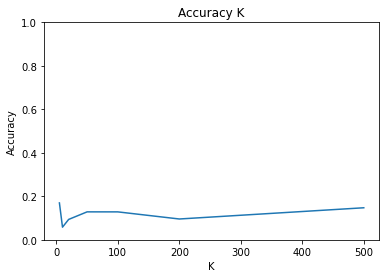

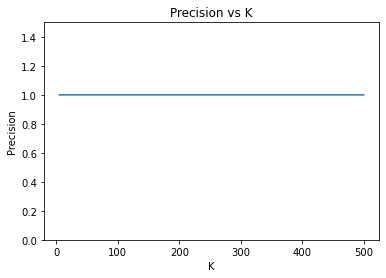

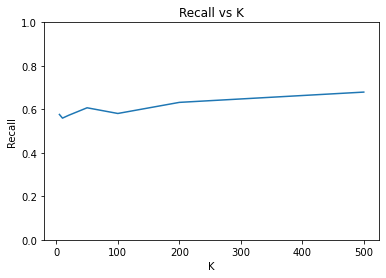

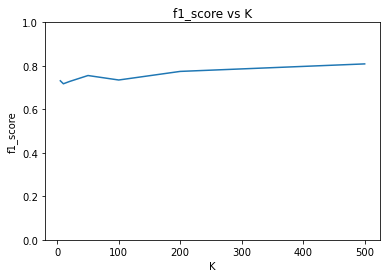

In [5]:
from utils import get_data, plot_metrics, normalize
from model import MultiClassSVM, PCA
from typing import Tuple


def get_hyperparameters() -> Tuple[float, int, float]:
    # get the hyperparameters
    return (0.01,1000,10)


def main() -> None:
    # hyperparameters
    learning_rate, num_iters, C = get_hyperparameters()

    # get data
    X_train, X_test, y_train, y_test = get_data()

    # normalize the data
    X_train, X_test = normalize(X_train, X_test)

    metrics = []
    for k in [5, 10, 20, 50, 100, 200, 500]:
        # reduce the dimensionality of the data
        pca = PCA(n_components=k)
        X_train_emb = pca.fit_transform(X_train)
        X_test_emb = pca.transform(X_test)

        # create a model
        svm = MultiClassSVM(num_classes=10)

        # fit the model
        svm.fit(
            X_train_emb, y_train, C=C,
            learning_rate=learning_rate,
            num_iters=num_iters,
        )

        # evaluate the model
        accuracy = svm.accuracy_score(X_test_emb, y_test)
        precision = svm.precision_score(X_test_emb, y_test)
        recall = svm.recall_score(X_test_emb, y_test)
        f1_score = svm.f1_score(X_test_emb, y_test)

        metrics.append((k, accuracy, precision, recall, f1_score))

        print(f'k={k}, accuracy={accuracy}, precision={precision}, recall={recall}, f1_score={f1_score}')

    # plot and save the results
    plot_metrics(metrics)


if __name__ == '__main__':
    main()